In [3]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
df = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
print(df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_12392\1412888557.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2022-01-01', end='2022-12-31')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100


In [11]:
print(df )

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100
...                ...         ...         ...         ...        ...
2022-12-23  130.173767  130.726603  127.982155  129.245785   63814900
2022-12-27  128.367203  129.729560  127.073957  129.699945   69007800
2022-12-28  124.428207  129.354393  124.260383  128.011784   85438400
2022-12-29  127.952553  128.811422  126.096597  126.353267   75703700
2022-12-30  128.268463  128.288212  125.800440  126.767912   77034200

[251 rows x 5 colum

In [14]:
print(df.columns.tolist())



[('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


In [15]:
print(df.columns)
print(type(df.columns[0]))  # Will show <class 'tuple'>


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
<class 'tuple'>


In [17]:
df.columns = ['_'.join(col) for col in df.columns]


In [18]:
print(df.columns.tolist())


['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']


In [19]:
df_sorted = df.sort_values(by='High_AAPL', ascending=False)
print(df_sorted.head())


            Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL
Date                                                                   
2022-01-04  176.378342  179.558457  175.809061  179.254190     99310400
2022-01-03  178.645660  179.499589  174.425155  174.542932    104487900
2022-01-05  171.686722  176.839679  171.411899  176.290033     94537600
2022-03-30  174.706329  176.514615  173.654762  175.472886     92633200
2022-03-29  175.875839  175.924966  173.300982  173.644956    100589400


In [20]:
high_price_rows = df[df['High_AAPL'] > 150]
print(high_price_rows)


            Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL
Date                                                                   
2022-01-03  178.645660  179.499589  174.425155  174.542932    104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190     99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033     94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737     96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226     86709100
...                ...         ...         ...         ...          ...
2022-10-28  153.493805  155.228415  145.688035  146.062544    164762400
2022-10-31  151.128372  152.015401  149.728855  150.950976     97943200
2022-11-01  148.477188  153.207961  146.979122  152.843303     80379300
2022-11-15  148.121292  151.625898  146.660222  150.273422     89868300
2022-11-18  149.355316  150.747289  148.052204  150.362277     74829600

[143 rows x 5 columns]


In [21]:
def price_category(price):
    if price >= 150:
        return 'High'
    elif price >= 100:
        return 'Medium'
    else:
        return 'Low'

df['Price_Level'] = df['High_AAPL'].apply(price_category)


KeyError: 'MA_7'

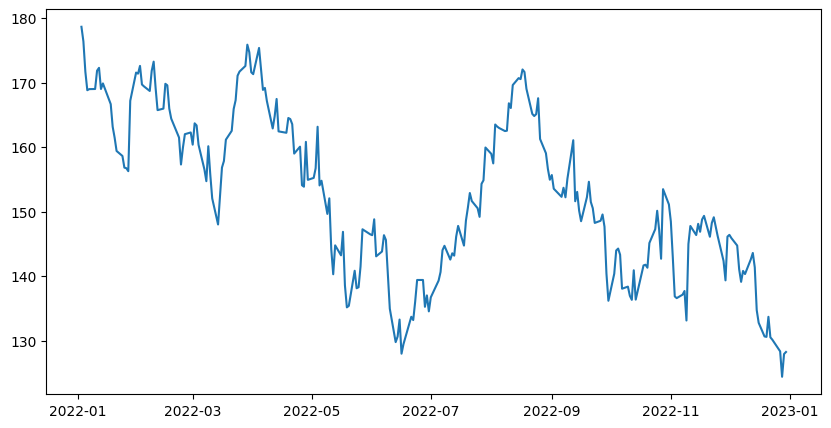

In [24]:
#Calculate the moving average for 7 days.import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close_AAPL'], label='Close Price')
plt.plot(df.index, df['MA_7'], label='7-Day MA', linestyle='--')
plt.title('AAPL Close Price vs 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
